   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      Setosa  
1       0      Setosa  
2       0      Setosa  
3       0      Setosa  
4       0      Setosa  

Class Distribution:
 target_name
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

Summary Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           

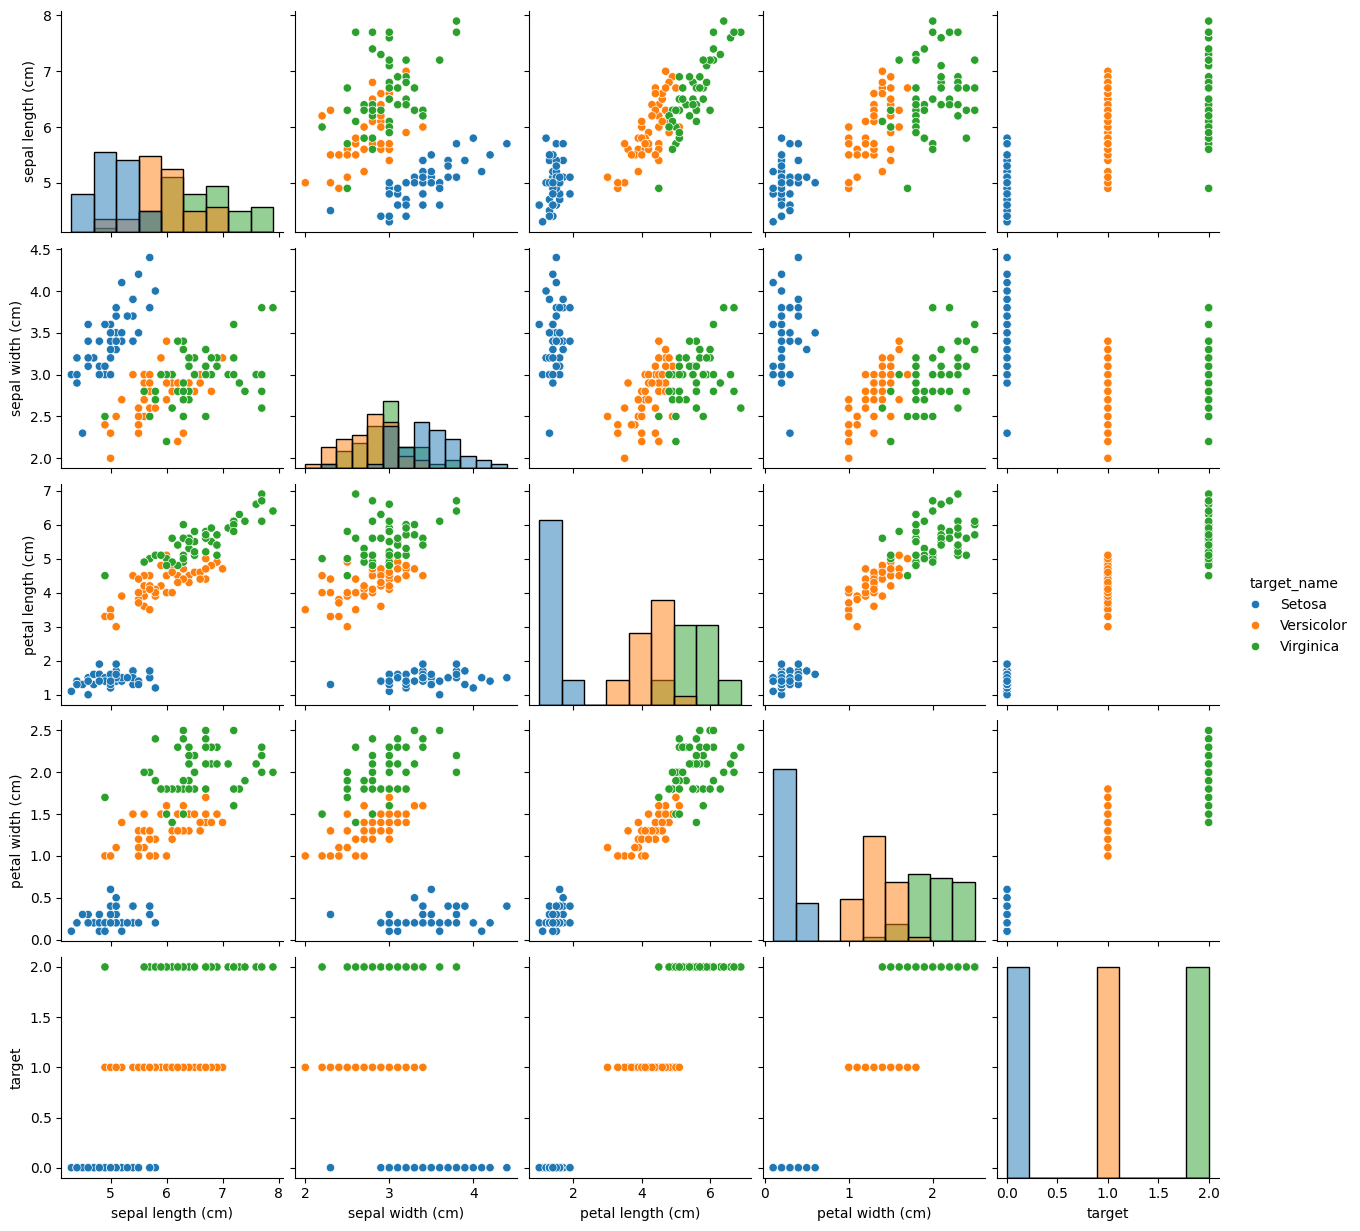

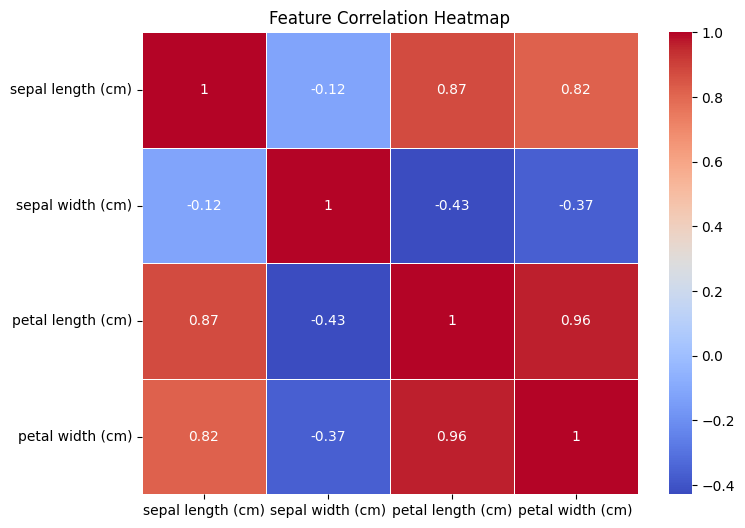

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Display first few rows
print(df.head())

# Check class distribution
print("\nClass Distribution:\n", df['target_name'].value_counts())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Pairplot for visualizing relationships
sns.pairplot(df, hue="target_name", diag_kind="hist")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['target', 'target_name']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
# Splitting dataset into train and test sets (80% train, 20% test)
X = df.drop(columns=['target', 'target_name'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling (K-NN is distance-based, so scaling improves performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply K-NN Classifier (Choosing k=5)
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)


Accuracy: 0.97

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



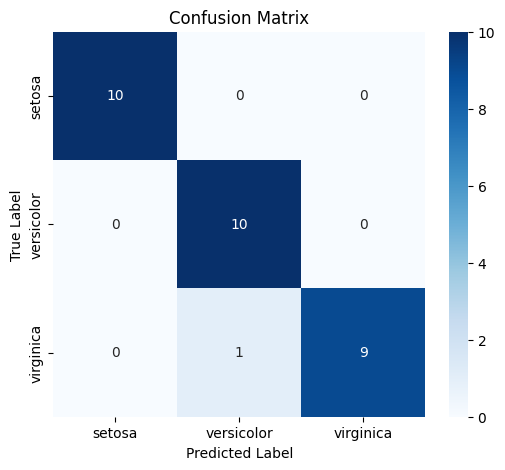

In [6]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


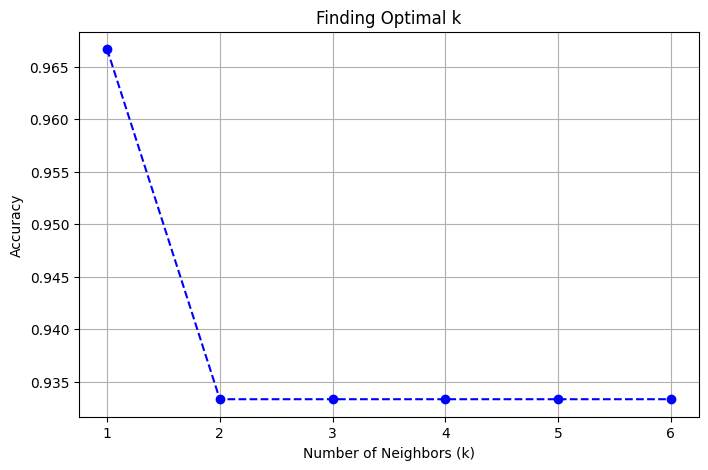

In [4]:
# Tuning
# Testing different k values
k_values = range(1, 7)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot k vs Accuracy
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Finding Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()
